# Analyzing survey data
Based on :https://www.dataquest.io/blog/how-to-analyze-survey-data-python-beginner/

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('survey_results_public.csv')

In [4]:
#snapshot of numeric fields
#looks like there are some bad entries in this so we'll have to correct these
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [46]:
#what does the data look like?
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [6]:
#detailed breakout of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [8]:
#get cols/rows of data
df.shape

(64461, 61)

In [35]:
#percentage of education
df['EdLevel'].value_counts(normalize = True)

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.462155
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.228309
Some college/university study without earning a degree                                0.126047
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.083074
Associate degree (A.A., A.S., etc.)                                                   0.032091
Other doctoral degree (Ph.D., Ed.D., etc.)                                            0.029427
Primary/elementary school                                                             0.016385
Professional degree (JD, MD, etc.)                                                    0.013930
I never completed any formal education                                                0.008584
Name: EdLevel, dtype: float64

<AxesSubplot:>

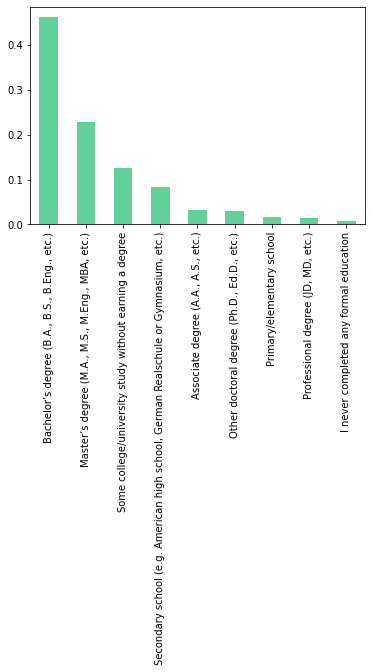

In [37]:
#bar graph of education percents
df['EdLevel'].value_counts(normalize=True).plot(kind='bar', color='#61d199')

In [38]:
#seperating out hobbyists data to focus on going forward
hobbyist_df = df[df['Hobbyist']=='Yes']

In [57]:
#break out hobbyists into two age groups
over50 = hobbyist_df[hobbyist_df['Age']>=50]
under25 = hobbyist_df[hobbyist_df['Age']<25]

In [58]:
print(over50['EdLevel'].value_counts(normalize=True))
print('~~~~~~~~~~~~~~~~~~')
print(under25['EdLevel'].value_counts(normalize=True))

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.358455
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.276124
Some college/university study without earning a degree                                0.157061
Other doctoral degree (Ph.D., Ed.D., etc.)                                            0.099430
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.038632
Associate degree (A.A., A.S., etc.)                                                   0.037365
Professional degree (JD, MD, etc.)                                                    0.025966
Primary/elementary school                                                             0.003800
I never completed any formal education                                                0.003167
Name: EdLevel, dtype: float64
~~~~~~~~~~~~~~~~~~
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.419485
S

In this we see that the total percentage between the groups to obtain either a bachelors or masters is about the same except the over 50 has a larger percentage with masters degrees. This makes sense as pursuing a masters degree is something that generally takes place later in one's career (although 50 does seem on the higher end to me).

In [92]:
#check the size of the data to see if it is of a reasonable magnitude
print(len(over50))
print(len(under25))

1620
10032


In [93]:
#lets now filter down to two subsets to only those under 25, people from India and the United States and also exclude users whose OpSys is MacOS
us_under25 = under25[(under25['Country']=='United States') &~ (under25['OpSys'] == 'MacOS' )] 
india_under25 = under25[(under25['Country']=='India') &~ (under25['OpSys'] == 'MacOS' )] 

In [195]:
#identify the languages each user uses and stack into a consolidated frame
us_langs=us_under25['LanguageWorkedWith'].str.split(';', expand=True)
us_lang_counts = us_langs.stack().value_counts()
us_lang_counts['Country'] = 'US'

india_langs=india_under25['LanguageWorkedWith'].str.split(';', expand=True)
india_lang_counts = india_langs.stack().value_counts()
india_lang_counts['Country'] = 'INDIA'

<AxesSubplot:>

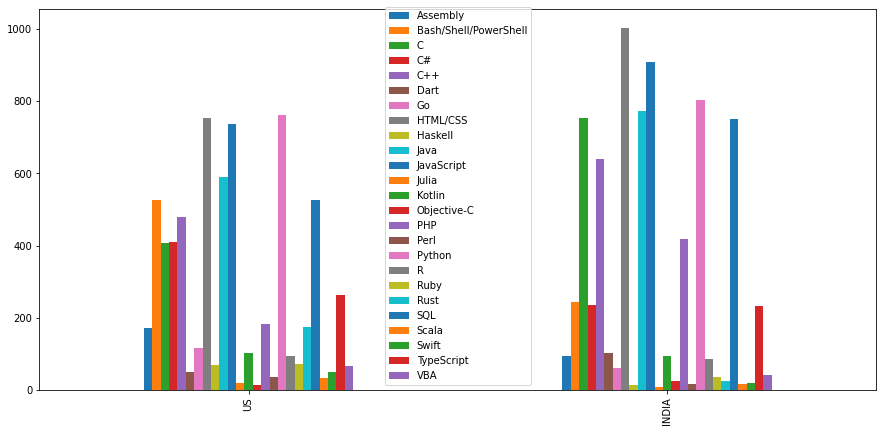

In [165]:
mult_index_frame=pd.concat([us_lang_counts,india_lang_counts],keys=['US','INDIA'])
mult_index_frame.unstack().plot(kind='bar', figsize=(15,7))

In [198]:
#let find languages for which there is a difference larger than 200
comparison_df = mult_index_frame.unstack()

for i in comparison_df.columns:
    if i != 'Country':
        if abs(comparison_df[i].iloc[0]-comparison_df[i].iloc[1]) > 200:
            print(i,'has a delta of',str(abs(comparison_df[i].iloc[0]-comparison_df[i].iloc[1])))


Bash/Shell/PowerShell has a delta of 283
C has a delta of 344
HTML/CSS has a delta of 251
PHP has a delta of 236
SQL has a delta of 225


With this information of the languages that are different for users between India and the US under the age of 25 who do not use a MacOS, we can begin diving deeper to understand these differences.